**author**: lukethompson@gmail.com<br>
**date**: 21 Nov 2016<br>
**language**: Python 3.5<br>
**conda environment**: emp-py3<br>
**license**: unlicensed<br>
    
## nestedness_nodf_plots.ipynb

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from empcolors import get_empo_cat_color
import seaborn as sns
%matplotlib inline

In [2]:
paths = ['/Users/luke.thompson/emp/analyses-nestedness/data/all/statisticsgraph.raw.csv',
         '/Users/luke.thompson/emp/analyses-nestedness/data/1_percent/statisticsgraph.raw.csv',
         '/Users/luke.thompson/emp/analyses-nestedness/data/all/statisticsgraph.ses.csv',
         '/Users/luke.thompson/emp/analyses-nestedness/data/1_percent/statisticsgraph.ses.csv']
path_out = '/Users/luke.thompson/emp/analyses-nestedness/nodf.pdf'

In [3]:
def plot_nodf(path, ylabel, ymin, ymax, title):
    df = pd.read_csv(path)
    plt.plot(df['TAXONOMIC_LEVEL_RANK'], df['EMPO_SUBSET=All'], marker='x', color='black', label='All EMPO')
    plt.plot(df['TAXONOMIC_LEVEL_RANK'], df['EMPO_SUBSET=Animal'], marker='x', color=get_empo_cat_color('Animal'), label='Animal')
    plt.plot(df['TAXONOMIC_LEVEL_RANK'], df['EMPO_SUBSET=Plant'], marker='x', color=get_empo_cat_color('Plant'), label='Plant')
    plt.plot(df['TAXONOMIC_LEVEL_RANK'], df['EMPO_SUBSET=Saline'], marker='x', color=get_empo_cat_color('Saline'), label='Saline')
    plt.plot(df['TAXONOMIC_LEVEL_RANK'], df['EMPO_SUBSET=Nonsaline'], marker='x', color=get_empo_cat_color('Non-saline'), label='Non-saline')
    #plt.xlabel('Taxonomic level')
    plt.title(title, fontsize=10)
    plt.ylabel(ylabel)
    plt.xticks(df['TAXONOMIC_LEVEL_RANK'], df['TAXONOMIC_LEVEL'], rotation=45)
    plt.axis([0.5, 5.5, ymin, ymax])

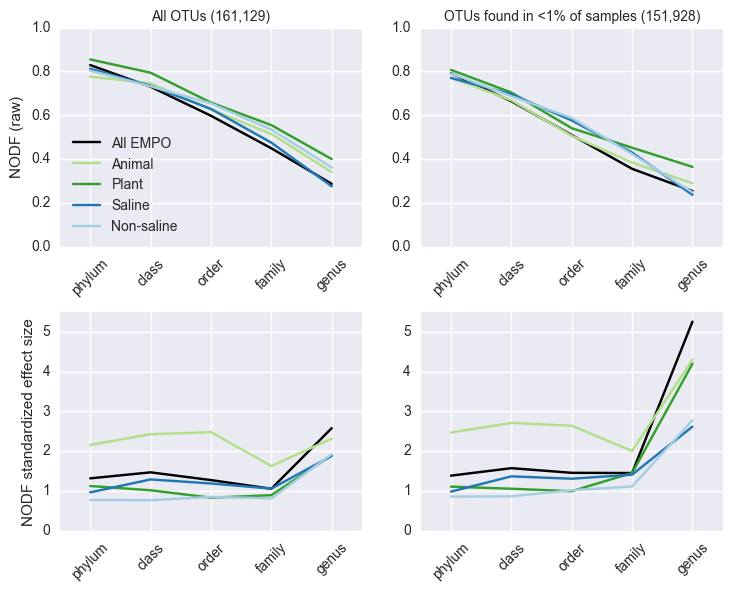

In [4]:
fig = plt.figure(figsize=(6,6))
# NODF
plt.subplot(221)
plot_nodf(paths[0], 'NODF (raw)', 0, 1, 'All OTUs (161,129)')
plt.legend(loc=3)
plt.subplot(222)
plot_nodf(paths[1], '', 0, 1, 'OTUs found in <1% of samples (151,928)')
# NODF std. effect size
plt.subplot(223)
plot_nodf(paths[2], 'NODF standardized effect size', 0, 5.5, '')
plt.subplot(224)
plot_nodf(paths[3], '', 0, 5.5, '')
plt.tight_layout()
fig.set_size_inches(8, 6)
plt.savefig(path_out)